#  Exploration des données du système Ford GoBike
## Par: Patrick Mballa

## Introduction
> Ce document présente une analyse exploratoire des données sur les trajets individuels effectués dans un système de partage de vélos dans la baie de San Franscico, au mois de février 2019.( bien que certains trajets se soient terminer en mars)

## Traitement prélimaines des données

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Chargement de l'ensemble des données choisi
bike_first = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Affichons les 10 premières lignes pour avoir une première idée du contenu de l'ensemble des données.

bike_first.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
#affichons la taille complète du tableau
bike_first.shape

(183412, 16)

In [5]:
# Un apperçu du type des données
bike_first.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# les statistiques descriptives générales
bike_first.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Les identifiants sont du type numérique, ce qui peut laisser penser qu'on peut y effectuer des calculs, ce qui n'est pas le cas; Que signifierait la somme de  deux identifiants de vélos par exemple? Nous allons donc changer le type en chaîne de caractère.    

In [7]:
# d'abord on fait une copie pour pouvoir revenir à la version originale au besoin.
bike = bike_first.copy()

In [8]:
# une fonction à utiliser s'il faut convertir le type en chaine de caractère
def convert_to_str(user_list):
    for elt in user_list:
        bike[elt] = bike[elt].astype(str)

In [9]:
id_list=['start_station_id' , 'end_station_id', 'bike_id']
convert_to_str(id_list)
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

Nous allons maintenant nous interesser aux colonnes contenant le temps, qui sont de type objet. nous désirons cela en type datetime pour ensuite séparer ces colonnes en plusieurs, contenant chacune le mois (On peut vouloir distinguer février de mars), le jour de la semaine, l'horaire Cela pourrait être utile pour des questions d'analyse telles que "Quand la plupart des trajets sont-ils effectués en terme de jour de la semaine?"

In [10]:
# Conversion de toutes les colonnes de date en type datetime
time_list =['start_time', 'end_time']
for time in time_list:
    bike[time] = pd.to_datetime(bike[time])
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [11]:
# création de nouvelles colonnes séparées  de mois, de jour de la semaine ou d'heure de la journée.
bike['start_month'] = pd.DatetimeIndex(bike['start_time']).month
bike['start_day_of_week'] = pd.DatetimeIndex(bike['start_time']).day_of_week
bike['start_hour'] = pd.DatetimeIndex(bike['start_time']).time

bike['end_month'] = pd.DatetimeIndex(bike['end_time']).month
bike['end_day_of_week'] = pd.DatetimeIndex(bike['end_time']).day_of_week
bike['end_hour'] = pd.DatetimeIndex(bike['end_time']).time

bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour,end_month,end_day_of_week,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2,3,17:32:10.145000,3,4,08:01:55.975000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,2,3,18:53:21.789000,3,4,06:42:03.056000


Puisque les données concernent exclusivement l'année 2019, on peut, au lieu de travailler avec les années de naissance, créer la colonne qui calcule les âges en fonction de l'année 2019. On pourra au passage supprimer les colonnes redondantes ou clairement inutiles. Naturellement, ceci n'est pas un travail axé sur le nettoyage de données, nous n'allons pas nous éterniser au traitement des données, mais il est important d'extraire des colonnes qui n'existent pas, mais qui pourront nous être utiles.

In [12]:
# Création d'une colonne pour les âges
bike['age'] = 2019-bike.member_birth_year.values
#vérification
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour,end_month,end_day_of_week,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2,3,17:32:10.145000,3,4,08:01:55.975000,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,2,3,18:53:21.789000,3,4,06:42:03.056000,NaN


In [13]:
# Suppression de la colonne "member_birth_year"
bike.drop(bike.iloc[:, np.r_[13]], inplace=True, axis=1)

In [14]:
# Conversion en chaine de caractère des colonnes 'start_month', 'start_day_of_week', 'end_month', 'end_day_of_week' 
user_list = ['start_month', 'start_day_of_week', 'end_month', 'end_day_of_week']
convert_to_str(user_list)
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_gender                      object
bike_share_for_all_trip            object
start_month                        object
start_day_of_week                  object
start_hour                         object
end_month                          object
end_day_of_week                    object
end_hour                           object
age                               float64
dtype: object

In [15]:
# Renommer les valeurs des mois et des jours de la semaine pour que cela soit plus significatif.
bike['start_month']=bike['start_month'].replace(['2'], 'febuary')
bike['end_month']=bike['end_month'].replace(['2','3'], ['febuary', 'march'])
bike['start_day_of_week']=bike['start_day_of_week'].replace(['0','1', '2','3','4','5','6'], ['monday', 'tuesday', 'wednesday','thursday', 'friday', 'saturday', 'sunday'])
bike['end_day_of_week']=bike['end_day_of_week'].replace(['0','1', '2','3','4','5','6'], ['monday', 'tuesday', 'wednesday','thursday', 'friday', 'saturday', 'sunday'])
# vérification
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour,end_month,end_day_of_week,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,Male,No,febuary,thursday,17:32:10.145000,march,friday,08:01:55.975000,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,No,febuary,thursday,18:53:21.789000,march,friday,06:42:03.056000,NaN


In [16]:
bike.shape

(183412, 22)

### Structure de l'ensemble des données?

> - L'ensemble de données traité comprend 183412 trajets individuels avec 16 caractéristiques pour chacun de ces trajets. Tel que l'ensemble des données est transmis, 9 caractéristiques des trajets sont numériques et les autres caractéristiques sont des données qualitatives. Cependant, il apparaît clairement que certains types sont ambigües et doivent être correctement traités comme cela a été fait dans les cellules documentées ci_dessus. Par ailleurs, certaines colonnes ont été ajoutées pour des questions futures d'analyse. 

> - A la fin de ce premier moment de traitement de données, On a un ensemble des données comprend désormais 183412 lignes et 22 colonnes. Parmi ces colonnes, 6 sont de type numérique/quantitatif, 10 sont de type qualitatif nominal, 4 sont de type qualitatif ordinale (les mois et les jours de la semaine), le deux autres sont de type datetime.

### Variable principale ou variable d'intérêt?
> Ce qui m'interesse est de connaitre les déterminants de la durée en secondes. En fait, il est question de savoir Quand, où comment, par quel type de vélos et par quel type de membre la plupart des trajets  sont-ils effectués en termes de durée?


### Variables explicatives
> Je présume les trajets sont plus réalisés le week-end qu'en milieu de semaine. Je suspecte également que les vélos en libre services pour toute la durée du trajet sont les plus utilisés. En outre, il se pourrait que les abonnés réalisent plus de trajet que les clients et que les hommes les moins âgés réalisent plus de trajet que les femmes les plus âgées. 


##  Exploration Univariée

#### Question 1: Cet ensemble de données contient -il des valeurs manquantes?
> Ceci peut permettre de continuer de traiter les données

In [17]:
na_counts = bike.drop(['duration_sec', 'start_time', 'end_time', 'start_station_id',
                      'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
                      'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip', 'start_month',
                      'start_day_of_week', 'end_month'], axis=1).isna().sum()


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


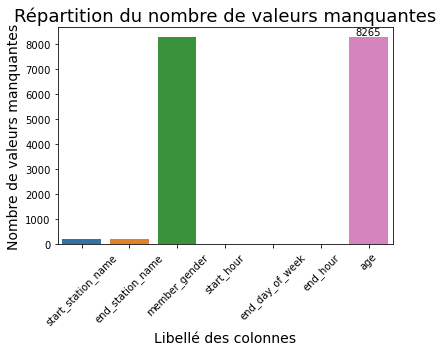

In [18]:
sb.barplot(na_counts.index.values, na_counts)

# obtenir les emplacements et les étiquettes des ticks actuels
plt.xticks(rotation=45)
plt.title("Répartition du nombre de valeurs manquantes", fontsize=18)
plt.xlabel("Libellé des colonnes", fontsize=14)
plt.ylabel("Nombre de valeurs manquantes", fontsize=14)
# Logique pour imprimer la valeur sur chaque barre
for i in range (na_counts.shape[0]):
    count = na_counts[i]

# Reportez-vous ici pour les détails de la fonction text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
plt.text(i, count+400, count, ha = 'center', va='top');

Il y a effectivement des valeurs manquantes dans cet ensemble de données. Nous allon nettoyer ces lignes.

In [19]:
#suppression des lignes avec les valeurs NaN
bike = bike.dropna()
# vérification
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour,end_month,end_day_of_week,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,Male,No,febuary,thursday,17:32:10.145000,march,friday,08:01:55.975000,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,Male,No,febuary,thursday,12:13:13.218000,march,friday,05:24:08.146000,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,Other,No,febuary,thursday,17:54:26.010000,march,friday,04:02:36.842000,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,Male,Yes,febuary,thursday,23:54:18.549000,march,friday,00:20:44.074000,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,Male,No,febuary,thursday,23:49:58.632000,march,friday,00:19:51.760000,60.0


In [20]:
# Reinitialisation des index
bike.reset_index(inplace=True, drop=True)
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour,end_month,end_day_of_week,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,Male,No,febuary,thursday,17:32:10.145000,march,friday,08:01:55.975000,35.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,Male,No,febuary,thursday,12:13:13.218000,march,friday,05:24:08.146000,47.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,Other,No,febuary,thursday,17:54:26.010000,march,friday,04:02:36.842000,30.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,Male,Yes,febuary,thursday,23:54:18.549000,march,friday,00:20:44.074000,45.0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,Male,No,febuary,thursday,23:49:58.632000,march,friday,00:19:51.760000,60.0


Il convient de sauvegarder cette version légèrement nettoyée pour des utilisation futures. D'ailleurs c'et elle qui sera utilisée dans la suite de l'analyse exploratoire et également dans l'analyse explicative. Bien entendu, nous n'avons pas la prétention d'avoir achevé le traitement des données, mais cela nous semble suffisant car nous avons ajouté à notre niveau ce qui pourrait nous sembler utile.

In [21]:
# Pour sauvegarder une copie assez nettoyée
#bike.to_csv('bike.csv', index=False)

In [22]:
# Changement en type Category des jours de la semaine et vérification
ordinal_var_dict = {'start_day_of_week': ['monday','tuesday','wednesday','thursday','friday','saturday', 'sunday'],
                    'end_day_of_week': ['monday','tuesday','wednesday','thursday','friday','saturday', 'sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_gender                      object
bike_share_for_all_trip            object
start_month                        object
start_day_of_week                category
start_hour                         object
end_month                          object
end_day_of_week                  category
end_hour                           object
age                               float64
dtype: object

#### Question 2: Comment se présente la distribution de la durée des trajets?

Analysons la distribution en secondes de la variable principale, la durée en secondes. Comme cela peut être vue comme une variable quantitative continue, nous allons utiliser un histogramme.

#### Visualisations

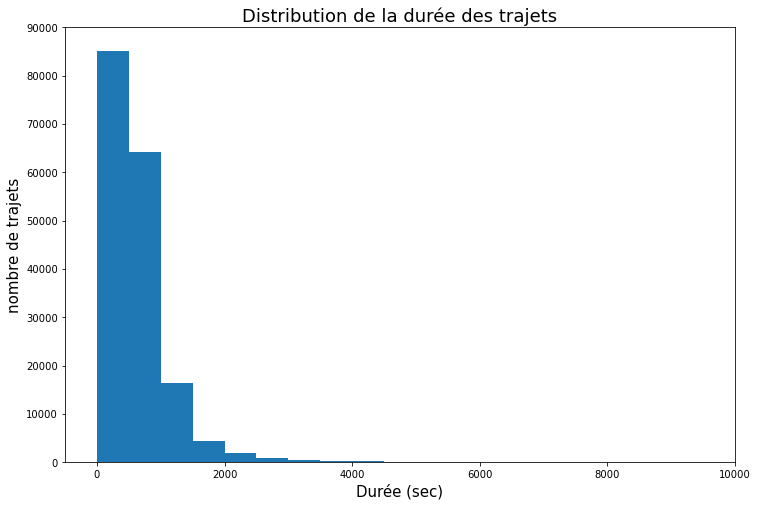

In [23]:
binsize = 500
bins = np.arange(0, bike.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.title('Distribution de la durée des trajets',fontsize=18)
plt.xlabel('Durée (sec)',fontsize=15)
plt.ylabel('nombre de trajets',fontsize=15)
plt.axis([-500, 10000, 0, 90000])
plt.show()

On va utiliser une échelle logarithmique pour mieux voir, parceque là, la distribution n'est pas perceptible vers la fin

C:\Users\HP\AppData\Local\Temp\ipykernel_3892\1096125929.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


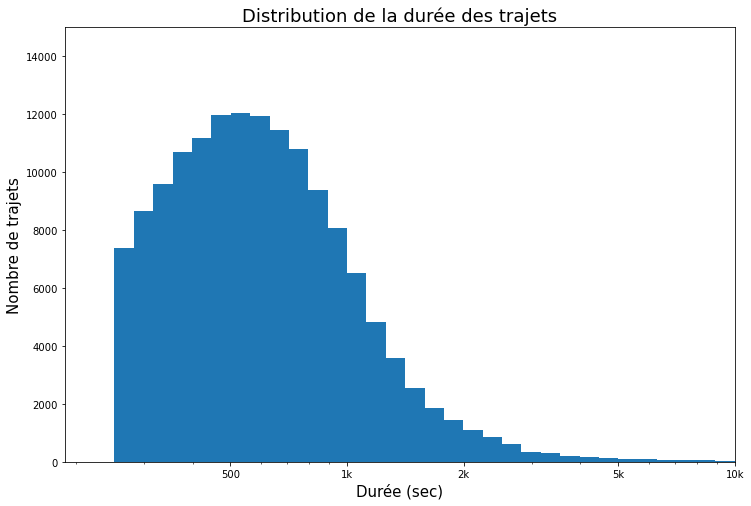

In [24]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(bike.duration_sec.max()) + log_binsize, log_binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = bike, x = 'duration_sec', bins = log_bins)
plt.title('Distribution de la durée des trajets',fontsize=18)
plt.xlabel('Durée (sec)', fontsize=15)
plt.ylabel('Nombre de trajets', fontsize=15)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

#### Observations
La durée des trajets est principalement concentrée sur la partie gauche. La plupart des trajets ont une durée inférieure à 2000 secondes avec un pic autour de 700 secondes. En fonction de la durée en secondes, le nombres de trajets est d'abord croissant de 8000 trajets environs jusqu'à environ 12000 trajets. Ensuite, l'on assiste à une décroissance (à partir d'environ 700 secondes) jusqu'à moins de 500 trajets. 

#### Question 3: Comment se présente la distribution des âges?

> Nous allons également faire un histogramme puisqu'on a toujours à faire à une variable quantitative que l'on peut supposer continue. 

#### Visualisations 

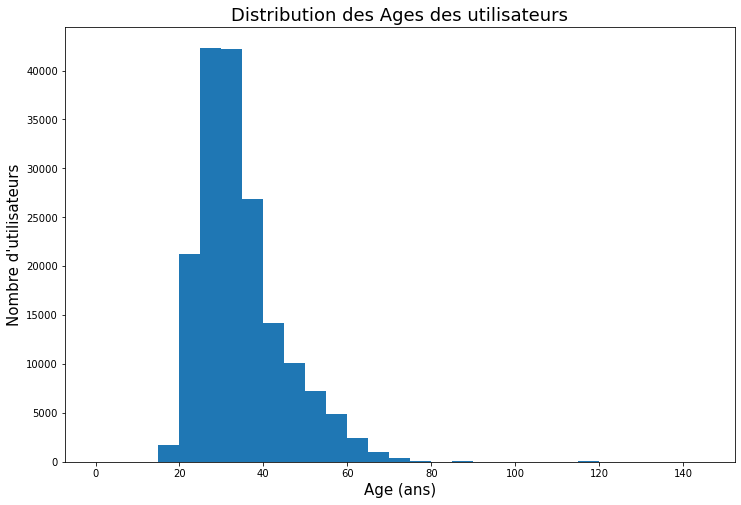

In [25]:
binsize = 5
bins = np.arange(0, bike.age.max()+binsize, binsize)
plt.figure(figsize=[12, 8])
plt.hist(data = bike, x = 'age', bins = bins)
plt.title('Distribution des Ages des utilisateurs',fontsize=18)
plt.xlabel('Age (ans)',fontsize=15)
plt.ylabel("Nombre d'utilisateurs",fontsize=15)
plt.show()

#### Observations
> Une forte concentration est observée entre 20 ans et 40 ans. On note également la présence des viellards de plus de 100 ans sur les trajets.

#### Question 4: Quelle est la répartition du nombre trajets en fonction des jours de la semaine?
> Les jours de la semaines sont des variables qualitatives. On peut opter pour des diagrammes à barres.

In [26]:
# définition d'une fonction permettant de tracer les diagrammes à barre simple
def barre(data,x,title,xlabel,ylabel,r):
    default_color = sb.color_palette()[0]
    sb.countplot(data=data, x=x, color = default_color,)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.xticks(rotation=r)
    plt.show();

#### Visualisation

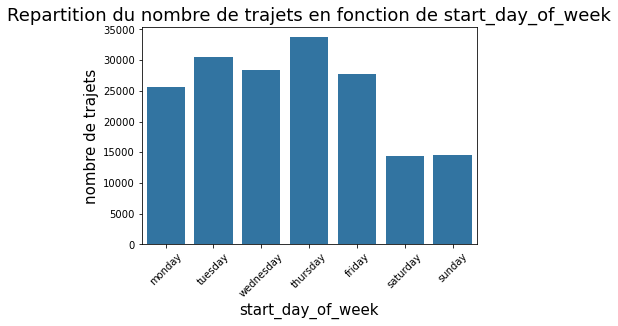

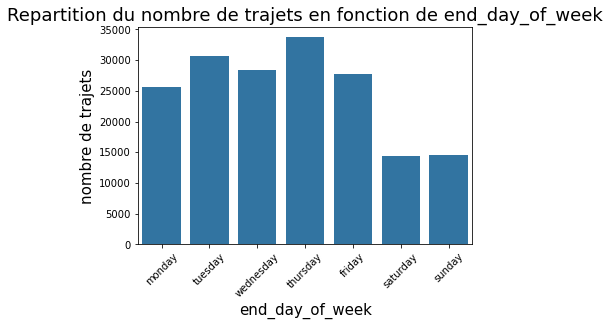

In [27]:
ordinal_list=['start_day_of_week','end_day_of_week']
for i in ordinal_list:
    barre(bike, i,"Repartition du nombre de trajets en fonction de "+i,i,'nombre de trajets',45)

#### Observations
> La répartition des jours de début de trajet indique journée de jeudi enrégistre le plus grand nombre de trajets de départ, suivi dan l'ordre de mardi, mercredi, vendredi, lundi, samedi et dimanche (Samedi et dimanche ont le même nombre de trajets) . le même ordre reste conservé en ce qui concerne les jours de fin  de trajet. 

  #### Question 5: Quelle est la répartition des trajets en fonction du genres ou du type de l'utilisateur ou de la nature du vélo?
  > les genres sont également des variables quantitatives, donc on utilise un diagramme à barres.

#### Visualisation

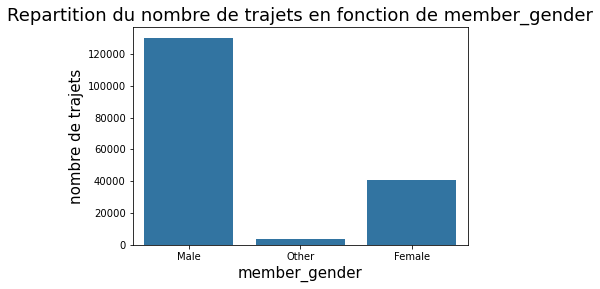

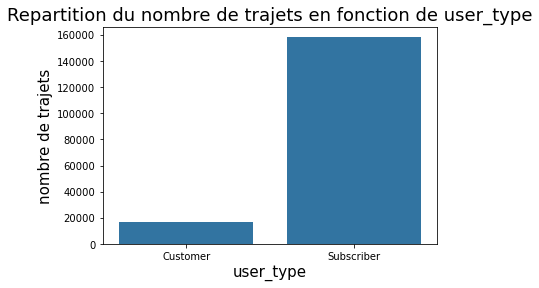

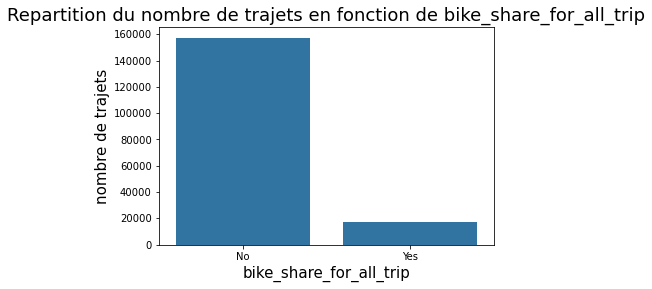

In [28]:
nominal_list=["member_gender", "user_type", "bike_share_for_all_trip"]
for i in nominal_list:
    barre(bike, i,"Repartition du nombre de trajets en fonction de "+i,i,'nombre de trajets',0)


#### Observations
> La grande majorité des trajets sont effectués par des hommes (pous de 120 000 trajets). Un peu plus de 40 000 trajets sont effectués par les femmes et les autres genres réalisent moins de 5000 trajets.

> La grande majorité des trajets a été effectuée par les abonnés (plus de 160 000). les clients ont réalisé moins de 20 000 trajets.

> La grande majorité des trajets sont effectués par des vélos qui ne sont pas  en libre service pour la duré du trajet (plus de 140 000 trajets)

### Discussions sur la distribution de la variable d'intérêt.

> La durée des trajets s'étale sur une très grande quanité de valeurs. Certains trajets sont treès long, avec une durée d'environ 10 000 secondes ou plus. une forte concentration est observé autour des trajets ayant moins de 2000 secondes de durée et la distribution des trajets est unimodale, avec un pic autour de 700 secondes, ayant un nombre de trajets d'environ 12000

### Modifications apportée à l'ensemble des données.
> Nous avons constatés qu'il y avait des valeurs manquantes dans l'ensemble des données, et nous avons préferé les supprimer au car il nous restait encore après cette opération, une très grande quantité de données pouvant nous permettre de voir les tendances souhaitées.

> En outre, nous avons remplacé la colonnes des années de naissances par celles des âges. Cela a été fait car l'âge donne une meilleure perception de la dépendance à la durée du voyage. Nous l'avons d'ailleurs documenté au moment de faire cette opération.  

##  Exploration Bivariée

> Dans cette section, nous allons continuer notre exploration en étudiant les relations et les rapport entre des paires de variables, en considérant dans la plupart des cas, la variable d'intérêt qui est la durée du trajet.

#### Question 6: La durée du trajet est_elle correlée à l'âge?
> Puisqu'il s'agit là de deux variables numériques, un nuage de point nous semble indiqué.

#### visualisation 1

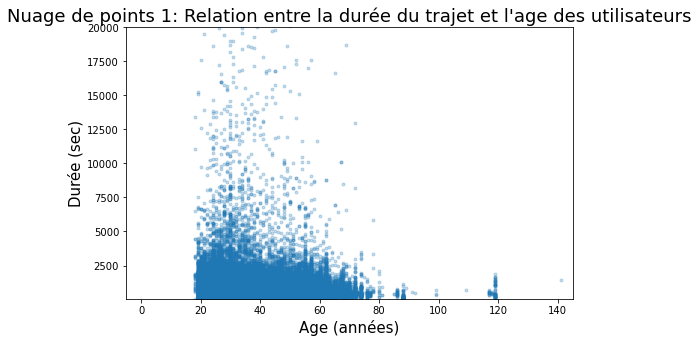

In [29]:
plt.figure(figsize=[8,5])
plt.scatter(bike.age, bike.duration_sec, alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 60, 20000])
plt.title("Nuage de points 1: Relation entre la durée du trajet et l'age des utilisateurs", fontsize=18)
plt.xlabel('Age (années)',fontsize=15)
plt.ylabel('Durée (sec)',fontsize=15)
plt.show()

#### Observation 1: 
> Aucune corrélation n'est à priori visible dans le graphique ci-dessus. On y apperçoit tout de même certains résultats obtenus à l'exploration univariée, car une forte concentration est visible dans la zone représentant les durées inférieures à 7500 secondes et de l'age inférieure à 80 ans. Le schéma ci-dessous consiste donc à Zoomer le nuage de points autour de ces valeurs.

#### Visualisation 2

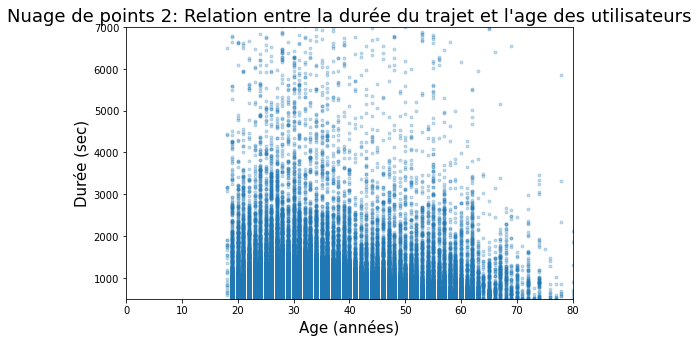

In [30]:
plt.figure(figsize=[8,5])
plt.scatter(bike.age, bike.duration_sec, alpha = 0.25, marker = '.' )
plt.title("Nuage de points 2: Relation entre la durée du trajet et l'age des utilisateurs",fontsize=18)
plt.axis([-0, 80, 500, 7000])
plt.xlabel('Age (années)',fontsize=15)
plt.ylabel('Durée (sec)',fontsize=15)
plt.show()

#### Observation 2
> Acune corrélation (ni positive, ni négative) ne semble être mise en évidence. Cependant, les points de données sont énormes; par conséquent, on peut utiliser une heat mat comme alternative à la transparence.   

#### Visualisation 3

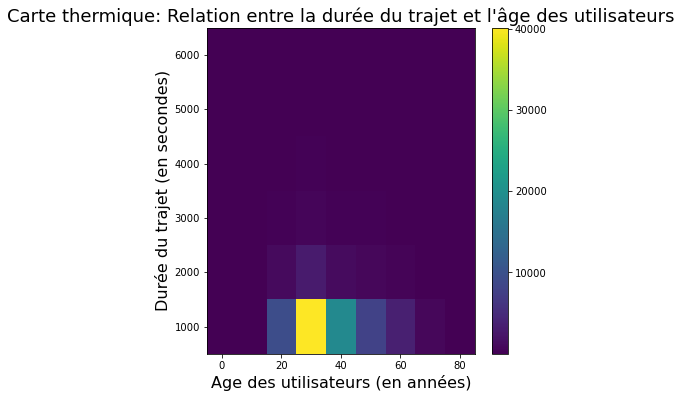

In [31]:
plt.figure(figsize=[6,6])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(bike['age'], bike['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000])
plt.title("Carte thermique: Relation entre la durée du trajet et l'âge des utilisateurs",fontsize=18)
plt.xlabel("Age des utilisateurs (en années)", fontsize=16)
plt.ylabel("Durée du trajet (en secondes)", fontsize=16)
plt.show();

#### observation 3:
> Il apparaît que utilisateurs les plus fréquents de vélos ont entre 20 et 35 ans. La durée la plus élevée est enregistrée par les membres les plus jeunes.

#### Question 7: Quelles relations existent entre la durée du trajet et le genre, ou le jour de la semaine ou même le type d'utilisateur?
> Puisqu'il s'agit de la relation entre une variable catégorielle et une variable numérique, les diagrammes en violon ainsi que les boîtes à moustache sont indiqués. Personnellement, j'opte pour les boîtes à moustaches pour deux raisons. la première est qu'ils me sont faciles à interpréter et la deuxième est qu'ils sont également utiles pour des visualisations explications (au cas où je pourrait en avoir besoin).

In [32]:
# définissons une fonction pour tracer une boîte à moustache. 
def moustache(data,x,y,xlabel,ylabel,r):
    base_color = sb.color_palette()[0]
    sb.boxplot(data = data, x = x, y =y, color = base_color)
    plt.title("Relation entre "+x +"et " +y, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.ylim([-5, 2500])
    plt.xticks(rotation=r)
    plt.show()

#### visualisations 

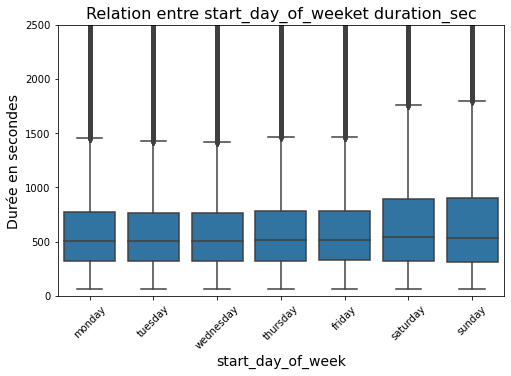

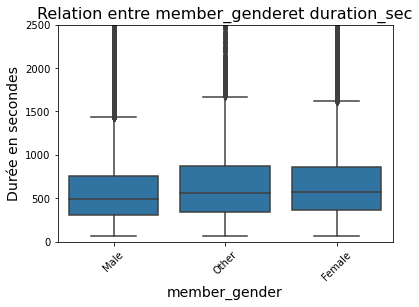

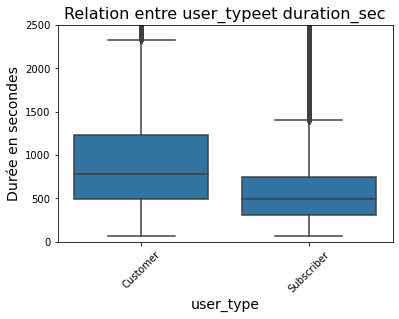

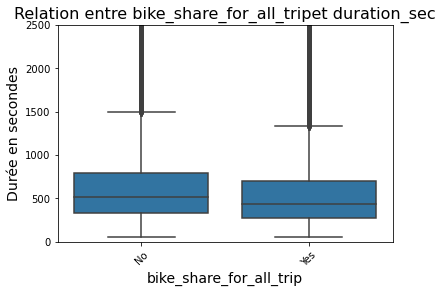

In [33]:
categorial_list = ["start_day_of_week", "member_gender", "user_type", "bike_share_for_all_trip"]
plt.figure(figsize = [8, 5])
for i in categorial_list:
    moustache(bike, i, 'duration_sec', i, "Durée en secondes", 45)

#### Observations
>  La dispersion de la durée du trajet semble la même pour tius les jours de semaine, mais cette dispersion est inférieure à celle observée le week-end.

> La durée du trajet est légèrement élévée chez les femmes et le genre autre que chez les hommes. La dispersion de la durée des trajets est également moins prononcée chez les hommes que chez les femmes et autres.

>Un pourcentage plus élevé de clients effectuent des trajets plus longs que les abonnés.

>Les vélos en libre service sur la totalité du trajet n'effectuent pas des trajets plus longs en durée que les autres vélos.

#### Question 8: La distribution des types d'utilisateurs est-elle la même le week-end? Les clients sont-ils interessés par les vélos en libre service?

#### visualisations

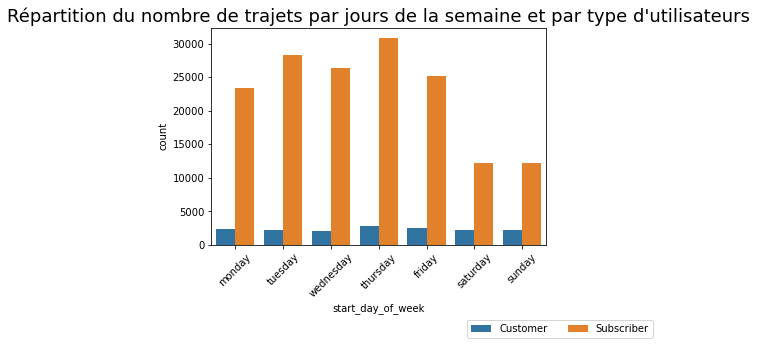

In [34]:
sb.countplot(data = bike, x = 'start_day_of_week', hue = 'user_type')
plt.title("Répartition du nombre de trajets par jours de la semaine et par type d'utilisateurs", fontsize=18)
plt.legend(loc=3, bbox_to_anchor=(0.75, -0.45),ncol=2)
plt.xticks(rotation=45);

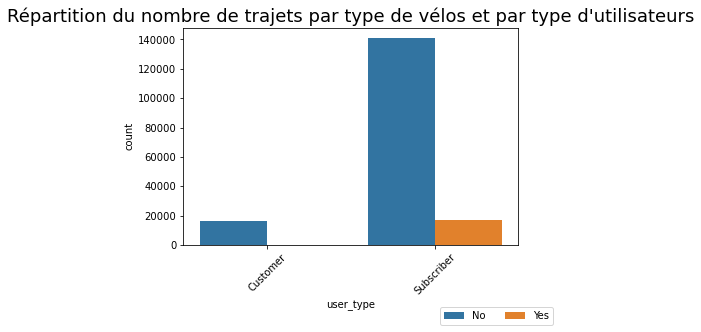

In [35]:
sb.countplot(data = bike, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.title("Répartition du nombre de trajets par type de vélos et par type d'utilisateurs",  fontsize=18)
plt.legend(loc=3, bbox_to_anchor=(0.75, -0.39),ncol=2)
plt.xticks(rotation=45);

#### Observations
> Les clients  sont répartis de la même manière le samedi et le dimanche. De même, les abonnés sont répartis de la même manière le week-end (Samedi et dimanche)

> Les cliens ne sont pas interssés par le vélos en libre service

### Quelques relations observées entre la variable d'intérêt et les autres variables.

> Les trajets de plus longues durée sont réalisés par les membres les plus jeunes, l'on s'attendait bien à ce type de résultat. Par ailleurs, le pourcentage de clients qui réalisent les trajets de longue durée est supérieur au pourcentage des abonnés qui font des trajests longs en durée. 

### Quelques realtions observées entre les autres variables.

> Il a été interessant de constater d'une part que  les vélos en libre service ne sont utilisés que par les abonnés; d'autre part, on a constaté qu'il n'y a pas de différence de rapport entre clients et abonnés en ce qui concerne le week-end (samedi et dimanche)

##  Exploration multivariée

> Nous continuons notre exploration en nous interessant aux relations faisant intervenir plus de deux variables.

Nous avons travaillé depuis le début avec dex variables numériques (durée du trajet et âge), une variable catégorielle ordinale (jour de la semaine) et trois variables catégorielles nominales (type d'utilisateur, genre et vélo en libre service).
> Commence par l'étude des relation entre les deux variables numérique et une variable catégorielle.

#### Question 9: Quelle relation existe-elle entre les variables numériques et le genre, ou le type d'utilisateur ou la nature du vélo?

#### visualisation

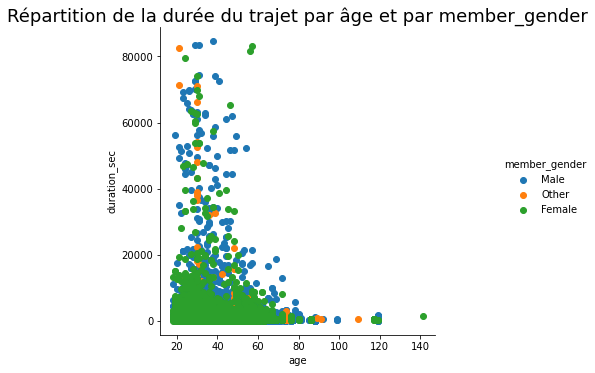

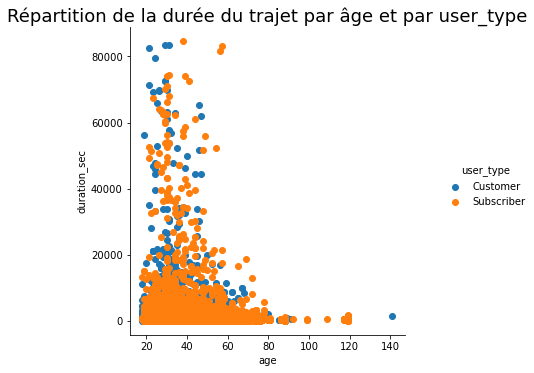

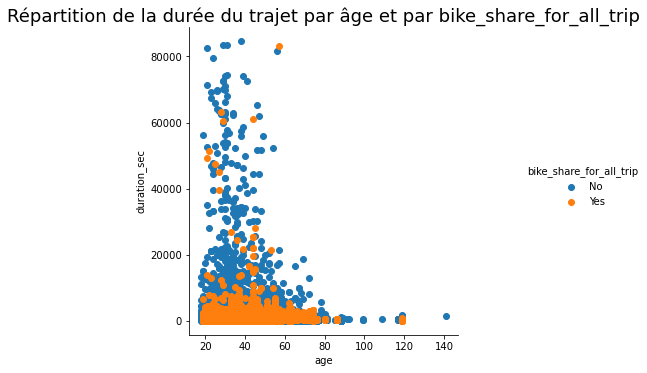

In [36]:
for i in nominal_list:
    g = sb.FacetGrid(data = bike, hue = i , height=5)
    g.map(plt.scatter, 'age', 'duration_sec')
    plt.title("Répartition de la durée du trajet par âge et par "+ i, fontsize=18)
    g.add_legend();

### observations
> Aucune corrélation entre l'age et la durée du trajet n'est à noter.Cependant, on peut relever que la plupart des vélos en libre service on fait des trajets de courte durée.

Attanquons nous aux relations entre la variable d'intérêt (durée en seconde) et quelques variables catégorielles
#### Question 10: Le jour de réalisation du trajet et le type d'utilisateur a-t-il un rapport avec la durée du trajet?
> Nous avons vu plus haut que les clients font de plus longs trajets en durée. Creusons un peu plus pour savoir si le jour de réalisation du trajet pourrait avoir une influence.

#### visualisation

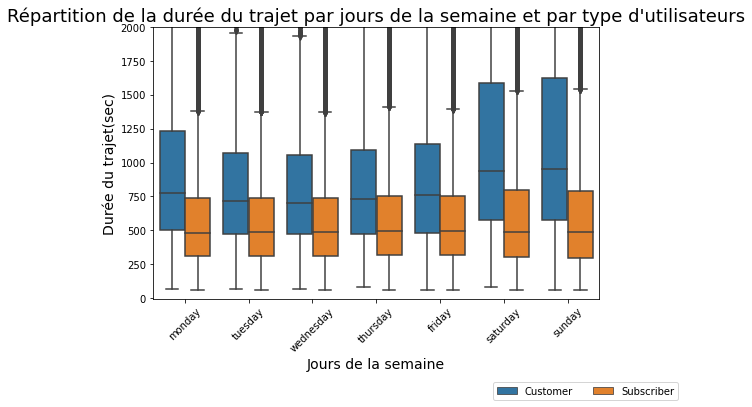

In [37]:
plt.figure(figsize=[8,5])
sb.boxplot(data=bike, x="start_day_of_week", y="duration_sec", hue="user_type")
plt.xticks(rotation=45)
plt.ylim([-5, 2000])
plt.title("Répartition de la durée du trajet par jours de la semaine et par type d'utilisateurs",fontsize=18)
plt.legend(loc=3, bbox_to_anchor=(0.75, -0.39),ncol=2)
plt.xlabel("Jours de la semaine", fontsize=14)
plt.ylabel("Durée du trajet(sec)", fontsize=14);

#### Observation
> De toute la semaine, les clients réalisent les trajets les plus longs, par rapport aux abonnés. De plus, les clients du week-end (ceux de samedi et dimanche) réalisent des trajets de plus longue durée que les clients des autres jours de la semaine.

#### Question 11: Le jour de réalisation du trajet et le genre a-t-il un rapport avec la durée du trajet?
> Là on va essayer de voir s'il y a un genre qui est particulièrement sensible à réaliser des trajets longs certains jours de la semaine.

#### Visualisation

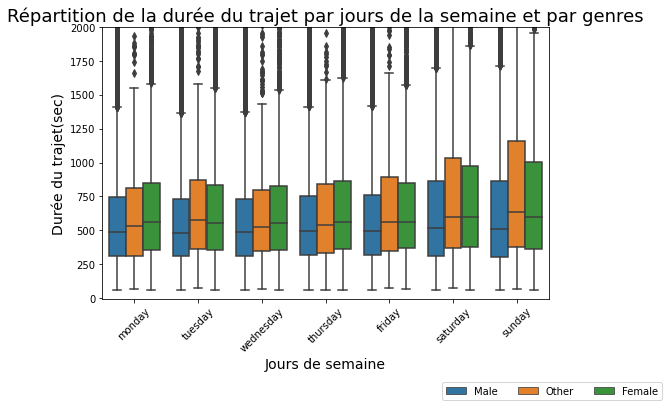

In [38]:
plt.figure(figsize=[8,5])
sb.boxplot(data=bike, x="start_day_of_week", y="duration_sec", hue="member_gender")
plt.xticks(rotation=45)
plt.ylim([-5, 2000])
plt.title("Répartition de la durée du trajet par jours de la semaine et par genres",fontsize=18)
plt.xlabel("Jours de semaine", fontsize=14)
plt.ylabel("Durée du trajet(sec)", fontsize=14)
plt.legend(loc=3, bbox_to_anchor=(0.75, -0.39),ncol=3);

#### Observations
> De tous les jours de la semaine, les hommes réalisent les trajets les moins longs en durée. les femmes réalisent les trajets plus longs que le genre autre uniquement le lundi, lundi, mercredi et jeudi. les samedi, lesz femmes et le genre autre ont es trajets d'égales distance.

#### Question 12: Quel genre de quel type d'utilisateur enrégistre la plus haute durée moyenne de trajet?
> Nous essayons d'extraire un classement de la durée moyenne des trajets en fonction des genres et des types d'utilisateurs.

#### Visualisation

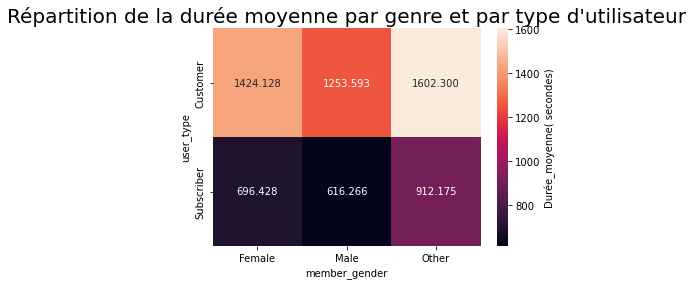

In [39]:
# la boite heatmap avec des valeurs
cat_means = bike.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'Duree_moyenne')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
values = 'Duree_moyenne')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
cbar_kws = {'label' : 'Durée_moyenne( secondes)'})
plt.title("Répartition de la durée moyenne par genre et par type d'utilisateur", fontsize=20);

#### Observation
> Les clients du genre autre  enrégistre la plus haute durée moyenne de trajet ( 1603 secondes environ) 

### Quelques observations concernant la variable d'intérêt et des paires d'autres variables.

> Les clients du week-end font des trajets plus long que le reste, les femmes et le genre autre réalisent les trajets de même durée le samedi, les clients du genre autre ont la plus grande durée moyenne de trajet.

### Une surprise.

> Je me serais attendu que les hommes fassent les plus les trajets de longue durée, mais je suis surpris que ce ne soit pas le cas.

## Conclusions
>La distribution de la durée des trajets est unimodale et tournée vers la gauche.

>La distribution des âges est concentrée entre 20 et 60 ans avec un pic autour de 40 ans 

> Aucune corrélation linéaire n'est perceptible entre l'age et la durée du trajet

> Un pourcentage plus élevé des clients effectuent des trajets effectuent des trajets plus longs que les abonnés.

> les hommes effectuent des trajets de bien moins longue durée que les deux autres genre mentionnés.
